# 1.0 Load Data and EDA

### Work book summary

In this workbook:
+ The forex and gold prices are loaded
+ 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import calendar

---

### Contents:
- [1.0 Data Source](#1.0-Data-Source)
- [2.0 Data Import](#2.0-Data-Import)
- [3.0 EDA Forex](#3.0-EDA-Forex)
    - [3.1 Summary Statistics](#3.1-Summary-Statistics)
    - [3.2 Investigate Outliers](#3.2-Investigate-Outliers)
    - [3.3 Plot Distributions](#3.3-Plot-Distributions)
    - [3.4 Check Seasonality](#3.4-Check-Seasonality)
- [4.0 EDA Gold](#4.0-EDA-Gold)

---

# 1.0 Data Source

The EUR/USD data came from the following web page - [FOREX data](https://www.histdata.com/).
    + The prices date from 2000 and 2019

The gold data came from the world gold council website - [Gold Data](https://www.gold.org/goldhub/data/gold-prices)
    + The data covers the forex time frame


---

# 2.0 Load Data

---

In [2]:
# Column Names
header_list = ['date','open','high','low','close','misc']

In [3]:
# Pull back data for 
for i in range(2000,2020):
    if i == 2000:
        eur_usd = pd.read_csv('/Users/stuartdaw/Documents/Capstone_data/data/csv/EURUSD_' + str(i) + '.csv', 
                              parse_dates=True, names=header_list, index_col='date')
    else:
        df = pd.read_csv('/Users/stuartdaw/Documents/Capstone_data/data/csv/EURUSD_' + str(i) + '.csv', 
                         parse_dates=True, names=header_list, index_col='date')
        eur_usd = pd.concat([eur_usd, df])

---

# 3.0 EDA Forex

## 3.1 Summary Statistics

In [4]:
# Check head and tail
eur_usd.head()

,open,high,low,close,misc
date,,,,,
2000-05-30 17:27:00,0.9302,0.9302,0.9302,0.9302,0.0
2000-05-31 00:50:00,0.9315,0.9315,0.9315,0.9315,0.0
2000-05-31 00:51:00,0.9315,0.9315,0.9315,0.9315,0.0
2000-05-31 00:55:00,0.9317,0.9317,0.9317,0.9317,0.0
2000-05-31 01:01:00,0.9318,0.9318,0.9318,0.9318,0.0


In [5]:
eur_usd.tail()

,open,high,low,close,misc
date,,,,,
2019-12-31 16:55:00,1.12117,1.12118,1.12115,1.12118,0.0
2019-12-31 16:56:00,1.12118,1.12120,1.12115,1.12115,0.0
2019-12-31 16:57:00,1.12115,1.12115,1.12105,1.12105,0.0
2019-12-31 16:58:00,1.12105,1.12110,1.12099,1.12099,0.0
2019-12-31 16:59:00,1.12099,1.12115,1.12076,1.12076,0.0


In [6]:
# Check Shape
eur_usd.shape

(6539013, 5)

In [7]:
# eur_usd.loc[eur_usd.index == '25/12/2019']

In [8]:
# Check for any errors
eur_usd.isnull().sum()

open     0
high     0
low      0
close    0
misc     0
dtype: int64

In [9]:
# eur_usd.loc[eur_usd.isnull().index]

In [10]:
# Check data types
eur_usd.dtypes

open     float64
high     float64
low      float64
close    float64
misc     float64
dtype: object

#### All are float values

In [11]:
# Look at the statistics
eur_usd.describe()

,open,high,low,close,misc
count,6.539013e+06,6.539013e+06,6.539013e+06,6.539013e+06,6539013.0
mean,1.228013e+00,1.228118e+00,1.227910e+00,1.228014e+00,0.0
std,7.831060e-01,7.831092e-01,7.831029e-01,7.831061e-01,0.0
min,-1.000000e-04,-1.000000e-04,-1.000000e-04,-1.000000e-04,0.0
25%,1.123140e+00,1.123230e+00,1.123060e+00,1.123140e+00,0.0
50%,1.236500e+00,1.236600e+00,1.236400e+00,1.236500e+00,0.0
75%,1.336480e+00,1.336570e+00,1.336390e+00,1.336480e+00,0.0
max,1.965000e+03,1.965000e+03,1.965000e+03,1.965000e+03,0.0


## Observations

+ There appears to be some errors as negative pricing for minimium price looks wrong

+ The standard deviation is consistent across all for Open, High, Low and close columns which is as expected and is around  0.78 

+ The trading high and mean both look sensible given checking against external sources such as [xe.com](https://www.xe.com/currencycharts/?from=EUR&to=USD)

## 3.2 Investigate Outliers

In [12]:
eur_usd.loc[(eur_usd['open'] < 0) | (eur_usd['high'] < 0) |(eur_usd['low'] < 0) | (eur_usd['close'] < 0)]

,open,high,low,close,misc
date,,,,,
2001-09-11 20:12:00,-0.0001,-0.0001,-0.0001,-0.0001,0.0


In [13]:
eur_usd.loc[(eur_usd['open'] > 100) | (eur_usd['high'] > 100) |(eur_usd['low'] > 100) | (eur_usd['close']  > 100)]

,open,high,low,close,misc
date,,,,,
2001-06-07 23:32:00,1965.0001,1965.0001,1965.0001,1965.0001,0.0


#### Investigate outliers and cross cheeck from different online sources

+ First one looks like an error
+ Second one looks wrong even if decimal place is corrected.

As this is such a small proportion of the dataset and the time periods will be grouped together I will remove as it will have no effect.



In [14]:
# Drop 2 rows
eur_usd.drop(eur_usd.loc[(eur_usd['open'] < 0) | (eur_usd['high'] < 0) 
                         |(eur_usd['low'] < 0) | (eur_usd['close'] < 0)].index, inplace=True)

In [15]:
eur_usd.drop(eur_usd.loc[(eur_usd['open'] > 100) | (eur_usd['high'] > 100) 
                         |(eur_usd['low'] > 100) | (eur_usd['close']  > 100)].index, inplace=True) 


In [16]:
# drop 'misc' columns as there is nothing there
eur_usd.drop(columns='misc', inplace=True)

In [17]:
# check its complete
eur_usd.head()

,open,high,low,close
date,,,,
2000-05-30 17:27:00,0.9302,0.9302,0.9302,0.9302
2000-05-31 00:50:00,0.9315,0.9315,0.9315,0.9315
2000-05-31 00:51:00,0.9315,0.9315,0.9315,0.9315
2000-05-31 00:55:00,0.9317,0.9317,0.9317,0.9317
2000-05-31 01:01:00,0.9318,0.9318,0.9318,0.9318


In [18]:
# See shape
eur_usd.shape

(6539011, 4)

In [19]:
# Check for missing data
eur_usd.isnull().sum()

open     0
high     0
low      0
close    0
dtype: int64

In [20]:
# Recheck the statistics after the changes
eur_usd.describe()

,open,high,low,close
count,6.539011e+06,6.539011e+06,6.539011e+06,6.539011e+06
mean,1.227713e+00,1.227818e+00,1.227610e+00,1.227714e+00
std,1.533031e-01,1.533198e-01,1.532871e-01,1.533035e-01
min,8.232000e-01,8.234000e-01,8.229000e-01,8.233000e-01
25%,1.123140e+00,1.123230e+00,1.123060e+00,1.123140e+00
50%,1.236500e+00,1.236600e+00,1.236400e+00,1.236500e+00
75%,1.336480e+00,1.336570e+00,1.336390e+00,1.336480e+00
max,1.603600e+00,1.604100e+00,1.603200e+00,1.603800e+00


#### Now they all look within range

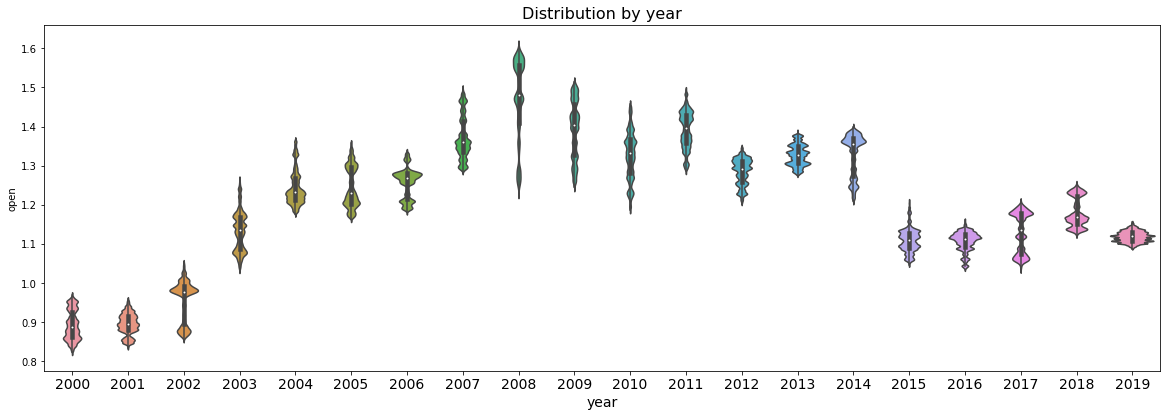

In [21]:
# Plot violin charts to see the distibutions and spread of data
plt.subplots(figsize=(20,14))

# By year
ax1 = plt.subplot(2,1,1)
sns.violinplot(x=eur_usd.index.year, y='open', data=eur_usd).set_xlabel('year', size=14)
plt.title('Distribution by year', size=16)
plt.xticks(size=14);


The Violn plot shows the distrbution of the prices each year. The distribution shows that each year has different spread or deviation of prices. This is caused by the volatiilty in the market and you can see in 2008 and 2009 tall thin distributions. This was due to the financial crisis. 2019 looks almost like its formaing a normal distribution and the price stayed stable throughout the year.

The yearly plots look like a series of normal distributions stuck together. This is due to the prices moving and then staying still and trading within a range before more significant news movs the mean again.

Text(0, 0.5, 'all data')

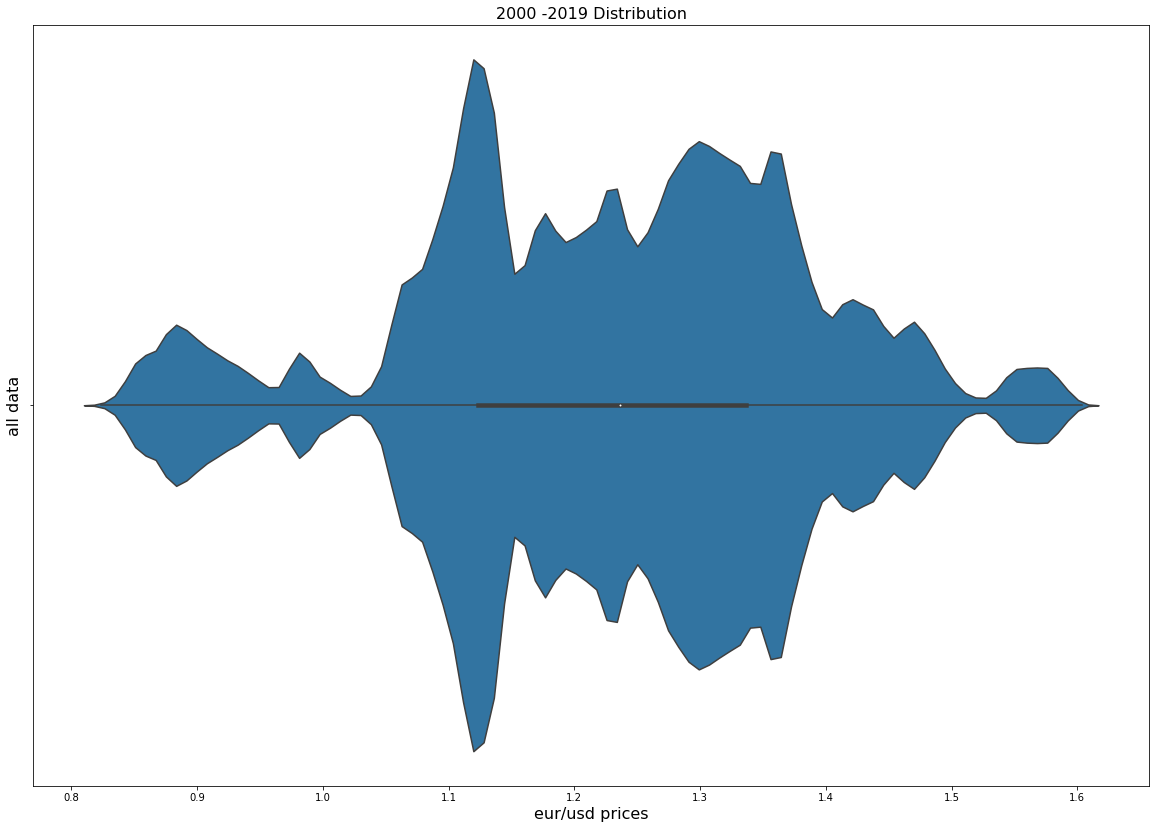

In [22]:
# Plot violin charts to see the distibutions and spread of data all together
plt.subplots(figsize=(20,14))

ax = sns.violinplot(x=eur_usd["open"])
plt.title('2000 -2019 Distribution', size=16)
plt.xlabel('eur/usd prices',size=16);
plt.ylabel('all data',size=16)

#### Observations

All the data together hasnt formed a normal distribution but is looks like its starting to. It doesnt have an extreme skew. It still currently looks like mulitple distributions stuck together.

## Check for seasonality

In [23]:
# Create useful date features
eur_usd['year'] = eur_usd.index.year
eur_usd['month'] = eur_usd.index.month
eur_usd['day'] = eur_usd.index.day

In [24]:
eur_usd.head()

,open,high,low,close,year,month,day
date,,,,,,,
2000-05-30 17:27:00,0.9302,0.9302,0.9302,0.9302,2000,5,30
2000-05-31 00:50:00,0.9315,0.9315,0.9315,0.9315,2000,5,31
2000-05-31 00:51:00,0.9315,0.9315,0.9315,0.9315,2000,5,31
2000-05-31 00:55:00,0.9317,0.9317,0.9317,0.9317,2000,5,31
2000-05-31 01:01:00,0.9318,0.9318,0.9318,0.9318,2000,5,31


In [25]:
eur_usd['close'].max()

1.6038

In [26]:
monthly = eur_usd[['close']].resample('M').max()
monthly['month'] = monthly.index.month
monthly['year'] = monthly.index.year

monthly.head(14)

,close,month,year
date,,,
2000-05-31,0.9379,5,2000
2000-06-30,0.9700,6,2000
2000-07-31,0.9598,7,2000
2000-08-31,0.9291,8,2000
2000-09-30,0.9040,9,2000
2000-10-31,0.8860,10,2000
2000-11-30,0.8770,11,2000
2000-12-31,0.9387,12,2000
2001-01-31,0.9599,1,2001


Text(0.5, 1.0, 'Prices over 12 months')

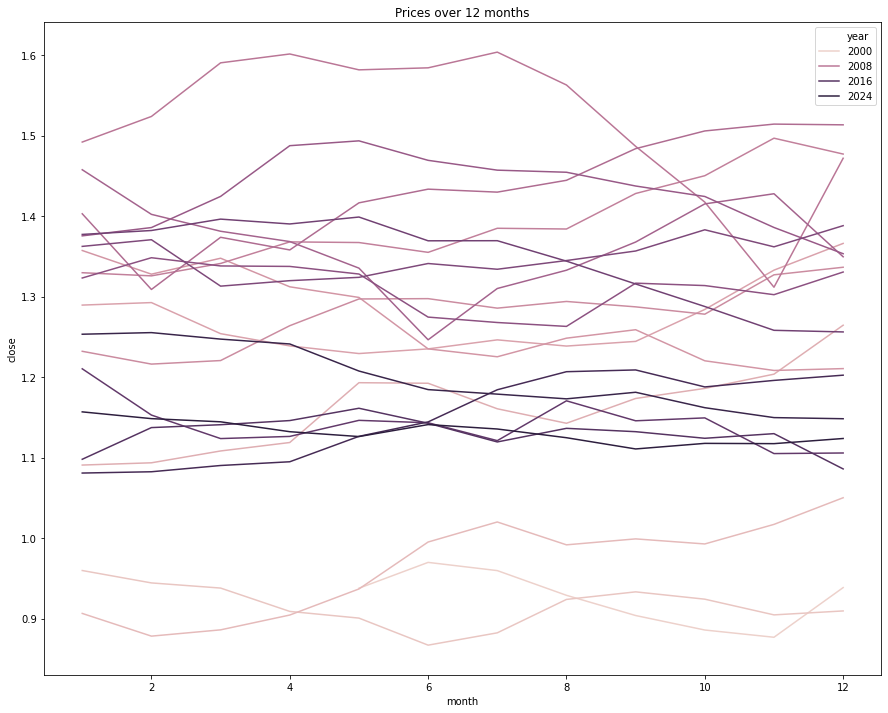

In [27]:
fig, ax = plt.subplots(figsize=(15,12),)
sns.lineplot(x="month", y="close", hue="year", data=monthly);
ax.set_title("Prices over 12 months")

### Observation

There doesnt appear to be seasonality over the year. However I will investigate further in the pre-processing to check to see if there is seasonality that cant be seen from the graphic.

---

In [28]:
# Save Daily Data

In [29]:
eur_usd.to_csv('/Users/stuartdaw/Documents/Capstone_data/data/csv/eur_usd.csv', index=True)

---

# Gold EDA

#### Outline

+ I will add the price for both USD and EUR. If I just use the price in one the the impact will be skewed. As the EUR/USD price moved it will affect the value of gold in only one currency. So by adding both I expect this effect to be negated.


+ The EDA is limited as its a supplementary dataset. 


+ The reason why I have chosen to add gold is that it it affects the EUR-USD price.  Gold and the USD have negative correlation to the USD.

[Gold/EUR correlation to USD](https://www.sunshineprofits.com/gold-silver/dictionary/euro-gold/). 

+ Gold is used as a safe haven for investors so it will capture some of the general market conditions.





In [30]:
# load data
gold = pd.read_csv('/Users/stuartdaw/Documents/Capstone_data/data/gold/historical_gold.csv', 
                              parse_dates=True, index_col='date', dayfirst=True)

In [31]:
# Check head
gold.head()

,usd,euro
date,,
2000-05-30,94.9,119.5
2000-05-31,94.6,119.8
2000-06-01,94.7,119.4
2000-06-02,97.9,121.7
2000-06-05,98.4,122.4


In [32]:
# Check tail
gold.tail()

,usd,euro
date,,
2020-07-20,630.9,647.6
2020-07-21,640.2,654.4
2020-07-22,643.6,652.0
2020-07-23,652.6,661.0
2020-07-24,660.9,667.7


In [33]:
# Check there are no missing values
gold.isnull().sum()

usd     0
euro    0
dtype: int64

In [34]:
# Check the statisics
gold.describe()

,usd,euro
count,5259.000000,5259.000000
mean,336.391424,322.364537
std,162.755764,153.297590
min,88.900000,113.400000
25%,151.900000,142.650000
50%,390.300000,371.600000
75%,455.350000,446.750000
max,660.900000,667.700000


In [35]:
# Check shape
gold.shape

(5259, 2)

In [36]:
# Save gold to file
gold.to_csv('/Users/stuartdaw/Documents/Capstone_data/data/gold/gold_clean.csv', index=True)